In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
data= pd.read_csv('D:\Data\data-visualization\drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
data.info() # BP -> Blood Pressure Levels (BP) , Na_to_K -> Na to Potassium Ration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


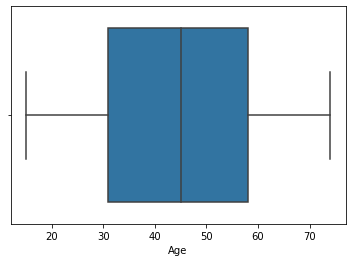

In [5]:
sns.boxplot(data= data, x='Age')
plt.show()

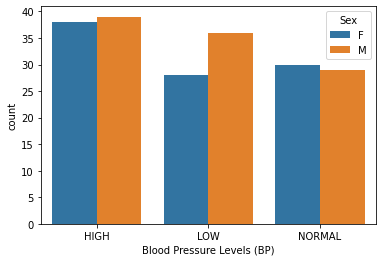

In [6]:
sns.countplot(data= data, x='BP', hue= 'Sex')
plt.xlabel('Blood Pressure Levels (BP)')
plt.show()

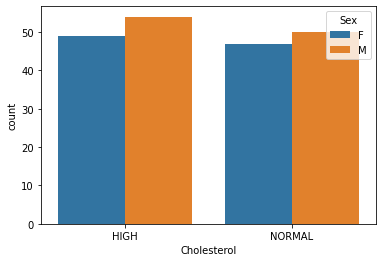

In [7]:
sns.countplot(data= data, x='Cholesterol',hue= 'Sex')
plt.show()

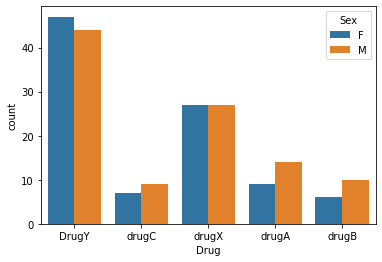

In [8]:
sns.countplot(data= data, x='Drug',hue= 'Sex')
plt.show()

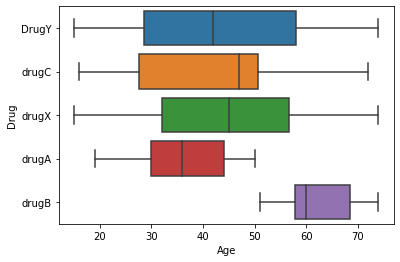

In [9]:
sns.boxplot(data= data, x='Age',y= 'Drug')
plt.show()

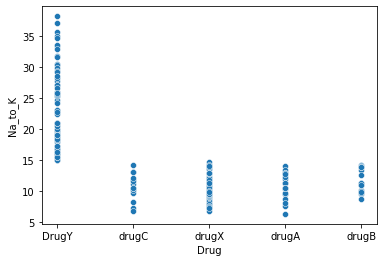

In [10]:
sns.scatterplot(data= data, x='Drug',y= 'Na_to_K')
plt.show()

In [11]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:, 1] = le_sex.transform(X[:, 1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:, 2] = le_BP.transform(X[:, 2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:, 3] = le_Chol.transform(X[:, 3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [12]:
y = data["Drug"]
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [14]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [16]:
predTree = drugTree.predict(X_test)

In [17]:
predTree [0:5]

array(['DrugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object)

In [18]:
y_test [0:5]

40     DrugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object

In [19]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  1.0
